import libraries

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

read data

In [2]:
ds = xr.open_dataset('./era5_ophelia.nc', engine='netcdf4')
ds

<xarray.Dataset>
Dimensions:    (longitude: 41, latitude: 33, time: 96)
Coordinates:
  * longitude  (longitude) float32 -14.0 -13.75 -13.5 -13.25 ... -4.5 -4.25 -4.0
  * latitude   (latitude) float32 56.0 55.75 55.5 55.25 ... 48.5 48.25 48.0
  * time       (time) datetime64[ns] 2017-10-14 ... 2017-10-17T23:00:00
Data variables:
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
    i10fg      (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-03-27 16:34:44 GMT by grib_to_netcdf-2.24.3: /opt/ecmw...

hard-coding array of times

In [3]:
times = []
for j in range(len(ds.u10.time)):
    times += [str(ds.u10.time[j])[36:55]]
times

['2017-10-14T00:00:00',
 '2017-10-14T01:00:00',
 '2017-10-14T02:00:00',
 '2017-10-14T03:00:00',
 '2017-10-14T04:00:00',
 '2017-10-14T05:00:00',
 '2017-10-14T06:00:00',
 '2017-10-14T07:00:00',
 '2017-10-14T08:00:00',
 '2017-10-14T09:00:00',
 '2017-10-14T10:00:00',
 '2017-10-14T11:00:00',
 '2017-10-14T12:00:00',
 '2017-10-14T13:00:00',
 '2017-10-14T14:00:00',
 '2017-10-14T15:00:00',
 '2017-10-14T16:00:00',
 '2017-10-14T17:00:00',
 '2017-10-14T18:00:00',
 '2017-10-14T19:00:00',
 '2017-10-14T20:00:00',
 '2017-10-14T21:00:00',
 '2017-10-14T22:00:00',
 '2017-10-14T23:00:00',
 '2017-10-15T00:00:00',
 '2017-10-15T01:00:00',
 '2017-10-15T02:00:00',
 '2017-10-15T03:00:00',
 '2017-10-15T04:00:00',
 '2017-10-15T05:00:00',
 '2017-10-15T06:00:00',
 '2017-10-15T07:00:00',
 '2017-10-15T08:00:00',
 '2017-10-15T09:00:00',
 '2017-10-15T10:00:00',
 '2017-10-15T11:00:00',
 '2017-10-15T12:00:00',
 '2017-10-15T13:00:00',
 '2017-10-15T14:00:00',
 '2017-10-15T15:00:00',
 '2017-10-15T16:00:00',
 '2017-10-15T17:

animations

In [4]:
windspeed = np.sqrt(ds.u10**2+ds.v10**2)

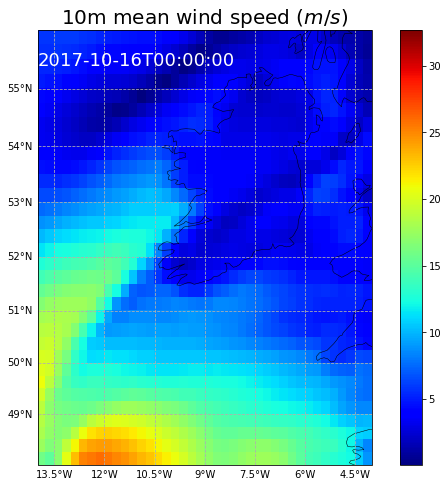

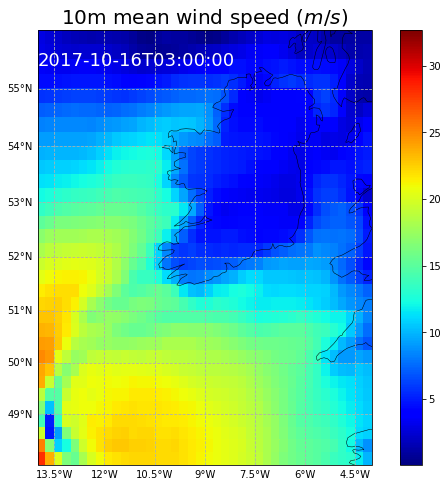

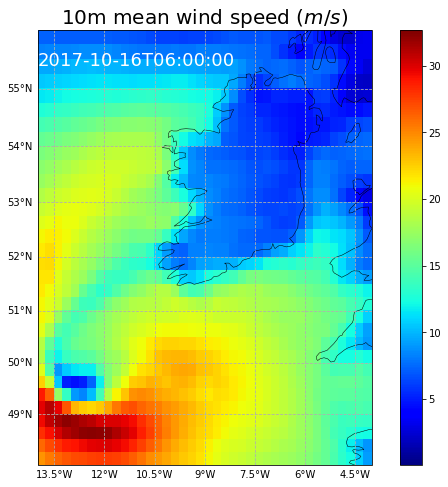

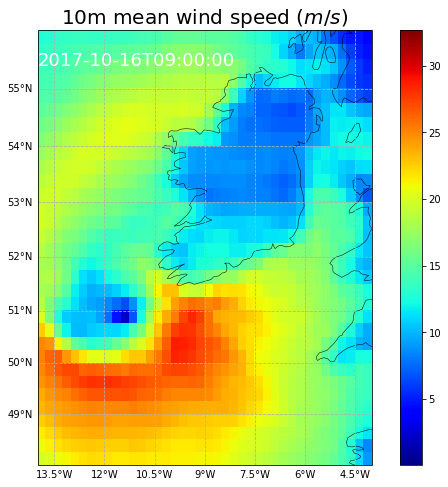

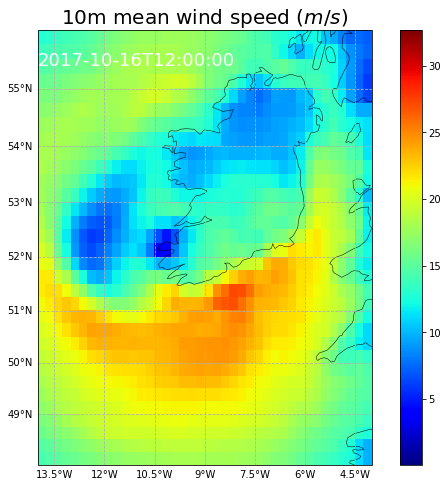

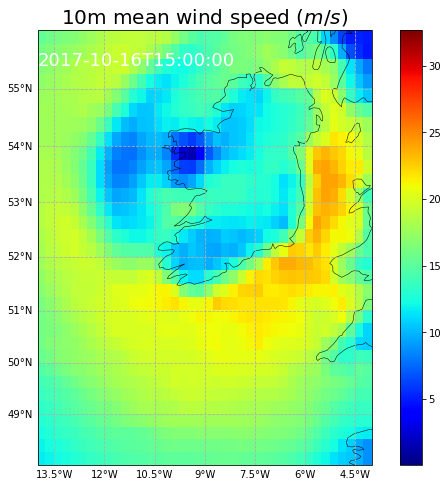

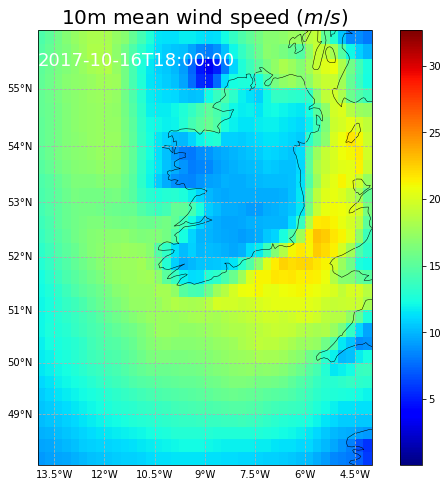

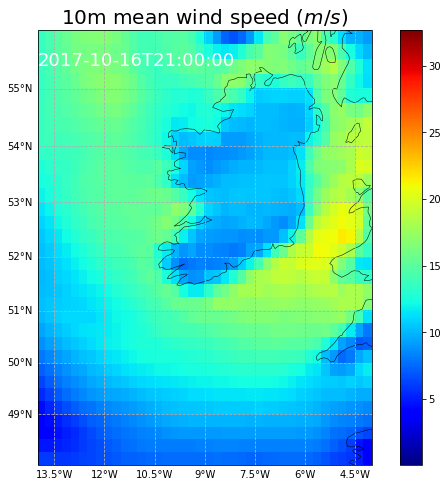

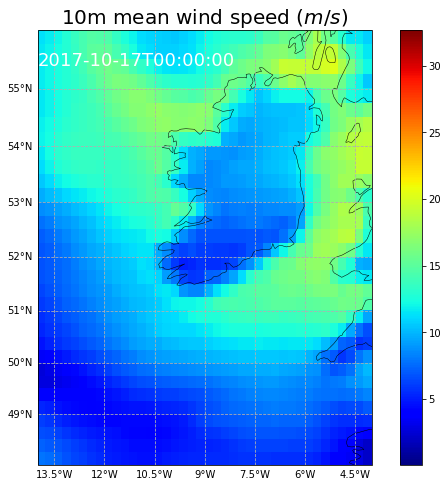

In [8]:
for t in range(0,27,3):
    fig = plt.figure(figsize=[10,8])
    ax = plt.axes(projection=ccrs.Mercator())
    grd = ax.gridlines(draw_labels=True, linestyle='--')
    grd.top_labels = False
    grd.right_labels = False

    ax.coastlines(resolution='50m', color='black', linewidth=0.5)
    ax.add_feature(cfeature.LAND)
    ax.set_extent([-14, -4, 48, 56], crs=ccrs.PlateCarree())
 
    lons, lats = np.meshgrid(windspeed.longitude, windspeed.latitude)
    cax = ax.pcolormesh(lons, lats, windspeed[48+t,:,:], cmap=cm.jet, vmin=float(np.min(windspeed)), vmax=float(np.max(windspeed)), transform=ccrs.PlateCarree())
    fig.colorbar(cax)

    time = ax.text(0, 0.95,times[48+t],color='w',fontsize=18,horizontalalignment='left',verticalalignment='top', transform=ax.transAxes)

    plt.xlabel('Longitude', fontsize=16)
    plt.ylabel('Latitude', fontsize=16, rotation=0)
    plt.title('10m mean wind speed ($m/s$)',fontsize=20)
    plt.draw()
    plt.show()

In [8]:
windgust = ds.i10fg

In [ ]:
import matplotlib.animation as ani
%matplotlib notebook

In [ ]:
fig = plt.figure(figsize=[8,6])
ax = plt.axes(projection=ccrs.Mercator())
grd = ax.gridlines(draw_labels=True, linestyle='--')
grd.top_labels = False
grd.right_labels = False

ax.coastlines(resolution='50m', color='black', linewidth=0.5)
ax.add_feature(cfeature.LAND)
ax.set_extent([-14, -4, 48, 56], crs=ccrs.PlateCarree())
 
lons, lats = np.meshgrid(windspeed.longitude, windspeed.latitude)
cax = ax.pcolormesh(lons, lats, windspeed[0,:,:], vmin=float(np.min(windspeed)), vmax=float(np.max(windspeed)), cmap=cm.viridis, transform=ccrs.PlateCarree())
fig.colorbar(cax)

time = ax.text(0, 0.95,'',color='w',fontsize=14,horizontalalignment='left',verticalalignment='top', transform=ax.transAxes)
    
def animate(i):
    cax = ax.pcolormesh(lons, lats, windspeed[i,:,:], vmin=float(np.min(windspeed)), vmax=float(np.max(windspeed)), cmap=cm.viridis, transform=ccrs.PlateCarree())
    time.set_text(times[i])
    
anim = ani.FuncAnimation(plt.gcf(), animate, interval=60, frames=np.shape(windspeed)[0],blit=False,repeat=False)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12, rotation=0)
plt.title('10m mean wind speed ($m/s$)',fontsize=18)
plt.draw()
plt.show()

In [ ]:
#""Instantaneous 10 metre wind gust"" animation
fig = plt.figure(figsize=[8,6])
ax = plt.axes(projection=ccrs.Mercator())
grd = ax.gridlines(draw_labels=True, linestyle='--')
grd.top_labels = False
grd.right_labels = False

ax.coastlines(resolution='50m', color='black', linewidth=0.5)
ax.add_feature(cfeature.LAND)
ax.set_extent([-14, -4, 48, 56], crs=ccrs.PlateCarree())
 
lons, lats = np.meshgrid(windgust.longitude, windgust.latitude)
cax = ax.pcolormesh(lons, lats, windgust[0,:,:], vmin=float(np.min(windgust)), vmax=float(np.max(windgust)), cmap=cm.viridis, transform=ccrs.PlateCarree())
fig.colorbar(cax)

time = ax.text(0, 0.95,'',color='w',fontsize=14,horizontalalignment='left',verticalalignment='top', transform=ax.transAxes)
    
def animate(i):
    cax = ax.pcolormesh(lons, lats, windgust[i,:,:], vmin=float(np.min(windgust)), vmax=float(np.max(windgust)), cmap=cm.viridis, transform=ccrs.PlateCarree())
    time.set_text(times[i])
    
anim = ani.FuncAnimation(plt.gcf(), animate, interval=60, frames=np.shape(windgust)[0],blit=False,repeat=False)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12, rotation=0)
plt.title('10 metre instantaneous wind gust ($m/s$)',fontsize=18)
plt.draw()
plt.show()

preparing time series data

Cork Airport: $51.85N, -8.49E$
    
Use coordinate points $p_1 = (51.75,-8.50)$ and $p_2(52.00,-8.50)$

with weighting

$corkairportdata = 0.6 p_1 + 0.4 p_2$

In [9]:
corkairport_mean = np.array(0.4*windspeed[:,17,22]+0.4*windspeed[:,16,22])
corkairport_gust = np.array(0.4*windgust[:,17,22]+0.4*windgust[:,16,22])

mean wind speed time series

Max Mean Wind Speed:  15.505127 at time  2017-10-16T11:00:00


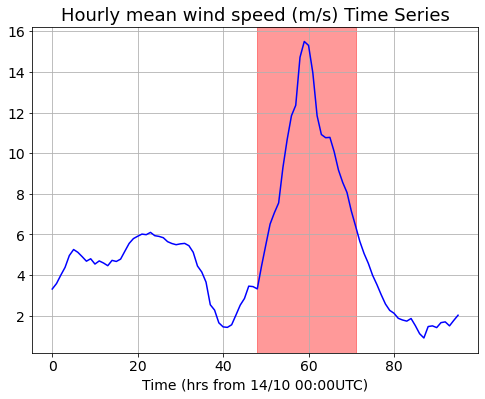

In [10]:
#Wind
fig, ax = plt.subplots(figsize=[8,6])
ax.plot(corkairport_mean,'b')
ax.axvspan(48, 71, alpha=0.4, color='red')
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Time (hrs from 14/10 00:00UTC)',fontsize=14)
plt.title('Hourly mean wind speed (m/s) Time Series',fontsize=18)

#Maximum
print('Max Mean Wind Speed: ', max(corkairport_mean), 'at time ', times[np.argmax(corkairport_mean)])

wind gust time series

Max Wind Gusts:  29.109077 at time  2017-10-16T11:00:00


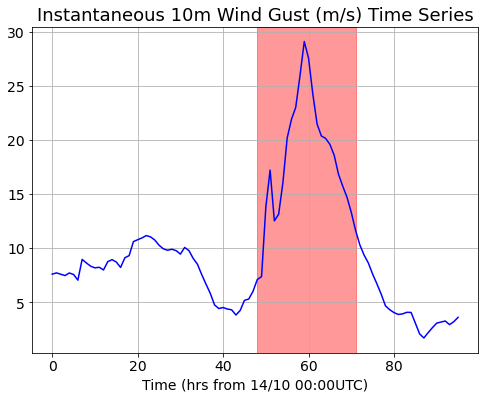

In [11]:
fig, ax = plt.subplots(figsize=[8,6])
ax.plot(corkairport_gust,'b')
ax.axvspan(48, 71, alpha=0.4, color='red')
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Time (hrs from 14/10 00:00UTC)',fontsize=14)
plt.title('Instantaneous 10m Wind Gust (m/s) Time Series',fontsize=18)

#Maximum
print('Max Wind Gusts: ', max(corkairport_gust), 'at time ', times[np.argmax(corkairport_gust)])

In [20]:
np.savetxt('era5.txt', corkairport_mean[48:72], delimiter=',')